K - Means

In [1]:
import matplotlib.pyplot as plotaGraf
fig = plotaGraf.figure()
fig.canvas.manager.full_screen_toggle()

<Figure size 432x288 with 0 Axes>

k-means
clustering 200 vetores com 2 componentes em 4 clustets
centroides
[[0.2255865402938798, 0.0032658137287944556], [-0.08434278990142047, -0.19869030881673097], [0.10291562768630684, 0.0036690626945346592], [0.002293882919475436, -0.33720335736405105]]

-----


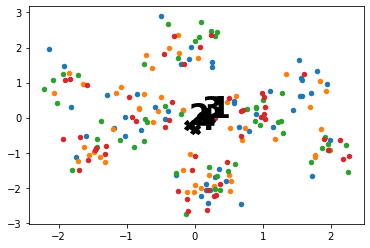

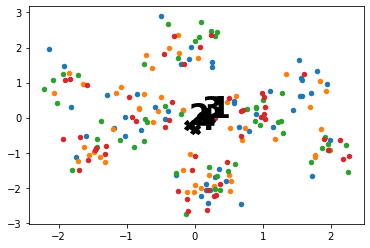

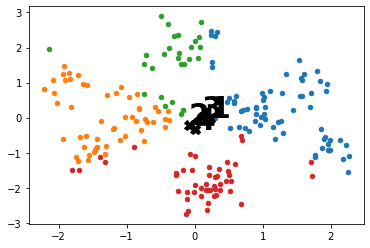

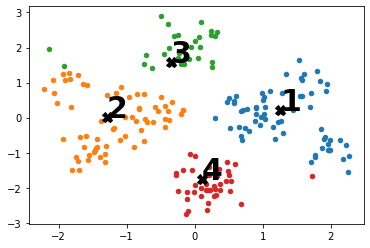

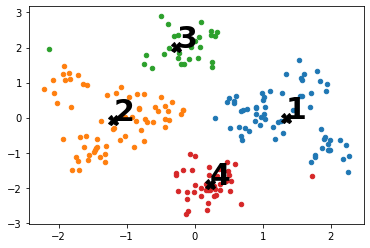

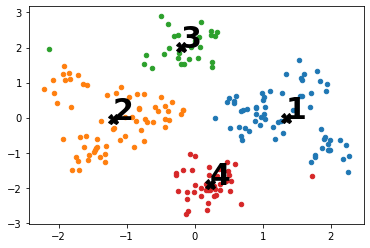

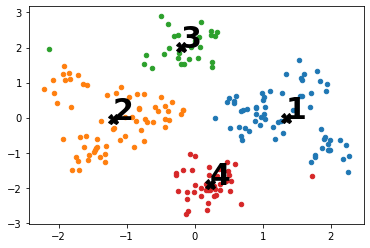

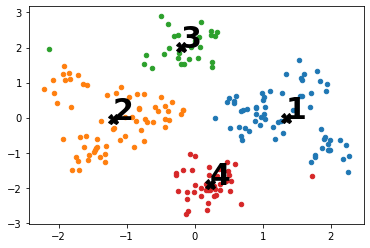

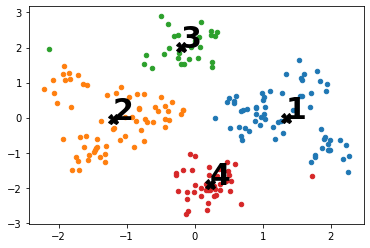

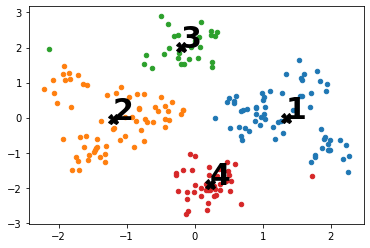

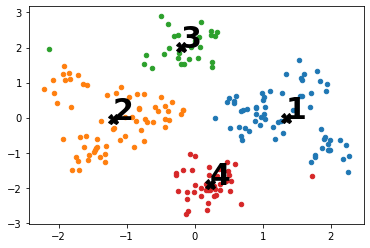

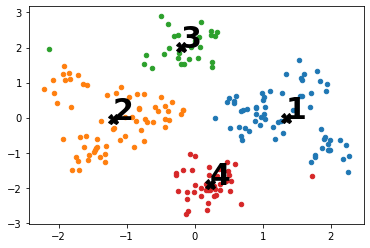

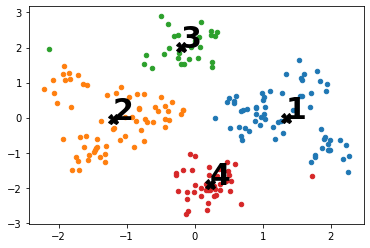

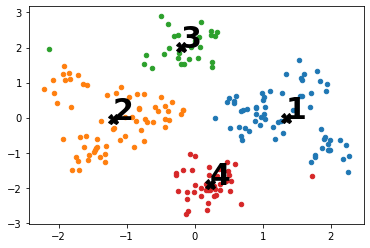

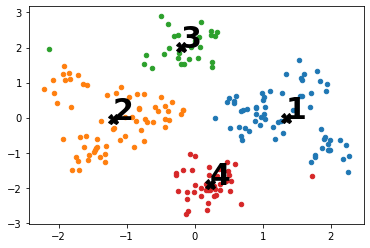

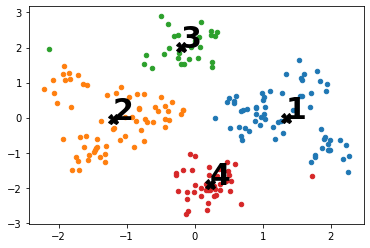

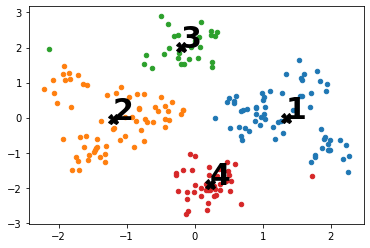

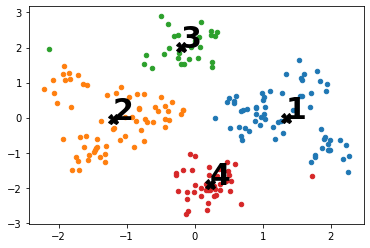

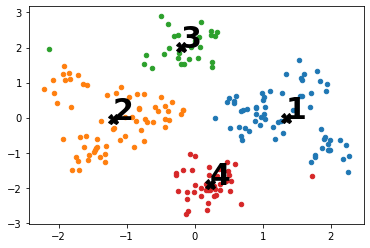

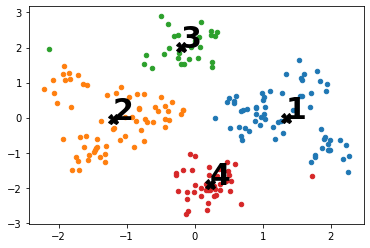

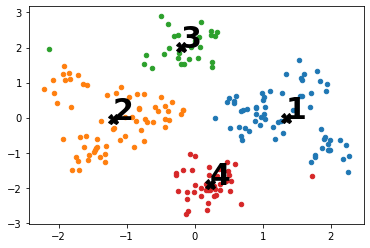

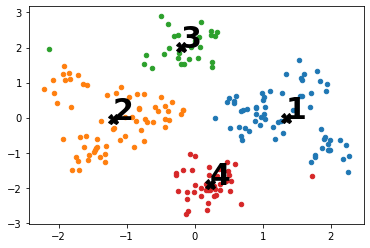

In [5]:
intrction = 20
nclusters = 4

nelements = 200
ncoords = 2 

growth = 0.3
aglome = 3


# Factorial
def fatorial(n):
	if n < 0:
		return -1 
	if n == 1 or n == 0:
		return 1
	return n*fatorial(n-1)

# Heron Method
def sqrt(s):
	x = s/2 
	
	while x**2 - s > 0.01  or x**2 - s < -0.01:
		x = ((s/x)+x)/2
	return x

# Taylor sin x em graus 
def sin(x):
	x = (x*3.1416)/180 
	s = 0
	for n in range(0,10):
		alpha = 2*n+1
		s = s + (((-1)**n)*(x**alpha))/fatorial(alpha)
	return s

# Tylor cos x em graus 
def cos(x):
	x = (x*3.1416)/180
	s = 0
	for n in range(0,10):
		alpha = 2*n
		s = s + (((-1)**n)*(x**alpha))/fatorial(alpha)
	return s

# method of congruencial linear
def myrand(x):
	x = hash(str(x)) 
	c = 1013904223
	a = 1664525
	m = 2**32
	x = (a*x+c) % m
	return x/m

# Distance euclidiana
def distancia(v1,v2):
	# If a cluster is empty
	if len(v1)==0 or len(v2)==0:
		return 1000 
	sum = 0
	for i in range(len(v1)):
		sum += ((v2[i]-v1[i])**2)
	return sqrt(sum)




              ## Funcoes basicas ##
	
def centroide(l):
	if len(l)==0:
		return [0,0]
	res = [0,0]
	for i in range(len(res)):
		for a in l:
			res[i]+=elms[a][i]
	for i in range(len(res)):
		res[i]/=len(l)
	return res

def calculaCentroides(l):
	res = []
	for i in l:
		res.append(centroide(i))
	return res

def printClusters(l):
	for n,c in enumerate(l):
		print("cluster: "+str(n))
		for x in c:
			print(elms[x])
		print()
	print()
	
def drawClusters(clusters,centroides):
	plotaGraf.clf()
	for n,c in enumerate(clusters):
		x=[]
		y=[]
		for e in c:
			x.append(elms[e][0])
			y.append(elms[e][1])
		plotaGraf.scatter(x,y, s=20)
		
		x = centroides[n][0]
		y = centroides[n][1]
		plotaGraf.plot(x,y,"black",markersize=10,marker="X")
		plotaGraf.annotate(n+1,(x,y),fontsize=30,weight='bold')
	fig.show()
	plotaGraf.pause(0.01)


# random points

elms = []
for i in range(nelements):
	v = []
		
	if ncoords > 2: 
		for n in range(ncoords):
			val = int(cos(n)+i)%aglome
			if myrand(i+myrand(n))>0.5: 
				val = -val
			else:
				val = +val
		
			if myrand(i+myrand(n))>0.5: 
				ruído = sin(myrand(i+myrand(n)))*growth
			else:
				ruído = -sin(myrand(i+myrand(n)))*growth
				
			v.append(val+ruído)
	elif ncoords==2: 
		centro = []
		for n in range(ncoords):
			val = int(cos(n)+i)%aglome
			if myrand(i+myrand(n))>0.5: 
				val = -val
			else:
				val = +val
			centro.append(val)

		for n in range(ncoords):
			for a in range(1,1000): 
				x = myrand(i+myrand(n)*a) 
				y = myrand(n+myrand(i)/a) 
				x = x if myrand(i+myrand(n))>0.5 else -x
				y = y if myrand(n+myrand(i))>0.5 else -y
				
        # Make sure you are within the radius
				if x**2 + y**2 < growth:
					centro[0] = centro[0]+x
					centro[1] = centro[1]+y
					break 

		v = centro
	elms.append(v)

# Random assignment to clusters
clusters= []
for i in range(nclusters):
	clusters.append([])
for i in range(len(elms)):
	pos = i%nclusters
	clusters[pos].append(i)

print("k-means")
print("clustering "+str(nelements)+" vetores com "+str(ncoords)+" componentes em "+str(nclusters)+" clustets")
centroides = calculaCentroides(clusters)
print("centroides")
print(centroides)
print()

#algorithm 
print("-----")
	
drawClusters(clusters,centroides)
plotaGraf.pause(0.5)

nova_atribuicao = []
for n in range(intrction):
	

	drawClusters(clusters,centroides)
  # Centroid calc
	centroides=calculaCentroides(clusters)
	for i in range(nclusters):
		clusters[i]=[]
	for e in range(len(elms)): 
		best = 0
		bestd = 1000
		for c in range(nclusters): 
			d = distancia(centroides[c],elms[e])
			if d < bestd:
				best = c
				bestd = d
		if len(clusters[best])==0:
			clusters[best]=[]
		clusters[best].append(e)

#printClusters(clusters)
print()
drawClusters(clusters,centroides)
plotaGraf.pause(5)

